In [19]:
import pandas as pd
import numpy as np
import glob

N_FOOD = 7  # number of food items in the task

files = sorted(glob.glob("results*.csv"))

avg_time_per_food = []
time_to_all_food = []
total_rewards = []

for file in files:
    df = pd.read_csv(file)

    timestamps = df["timestamp"].values
    food_collected = df["food_collected"].values
    fitness = df["fitness"].values

    # --- Total reward ---
    total_rewards.append(np.sum(fitness))

    # --- Avg time per food ---
    # Find timestamps when food count increases
    food_change_idxs = np.where(np.diff(food_collected) > 0)[0] + 1

    if len(food_change_idxs) > 0:
        food_times = timestamps[food_change_idxs]
        t_start = timestamps[0]
        total_time_to_last_food = food_times[-1] - t_start
        avg_t = total_time_to_last_food / len(food_times)
    else:
        avg_t = np.nan

    avg_time_per_food.append(avg_t)

    # --- Time to all food ---
    all_food_idx = np.where(food_collected >= N_FOOD)[0]
    if len(all_food_idx) > 0:
        t_all = timestamps[all_food_idx[0]] - timestamps[0]
    else:
        t_all = np.nan

    time_to_all_food.append(t_all)

# Convert to arrays
avg_time_per_food = np.array(avg_time_per_food, dtype=float)
time_to_all_food = np.array(time_to_all_food, dtype=float)
total_rewards = np.array(total_rewards, dtype=float)

# --- Compute mean and std ---
results = {
    "Metric": ["Avg Time per Food (s)", "Time to All Food (s)", "Total Reward"],
    "Mean": [
        np.nanmean(avg_time_per_food),
        np.nanmean(time_to_all_food),
        np.nanmean(total_rewards),
    ],
    "Std": [
        np.nanstd(avg_time_per_food),
        np.nanstd(time_to_all_food),
        np.nanstd(total_rewards),
    ],
}

summary_df = pd.DataFrame(results)

print("\n=== SUMMARY TABLE ===")
print(summary_df.round(2))

# Optional: save to CSV for slides / report
summary_df.to_csv("summary_table.csv", index=False)
print("\nSaved summary_table.csv")



=== SUMMARY TABLE ===
                  Metric      Mean      Std
0  Avg Time per Food (s)      5.40     1.69
1   Time to All Food (s)     37.44    12.27
2           Total Reward  18567.74  2067.54

Saved summary_table.csv


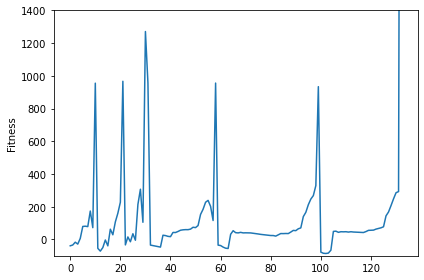

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load CSV ---
path = "results1.csv"   # adjust if needed
df = pd.read_csv(path)

# --- X-axis: step index (cleaner than timestamps for interpretation) ---
steps = range(len(df))
fitness = df["fitness"].values

# --- Plot ---
plt.figure()
plt.plot(steps, fitness)
# plt.xlabel("Step")
plt.ylabel("Fitness")
plt.ylim(bottom=-100, top=1400)
# plt.title("Fitness over Time")
plt.tight_layout()
plt.show()

# --- Save figure ---
# output_path = "fitness_results1.png"
# plt.savefig(output_path)
# plt.close()

# print("Saved:", output_path)


<function matplotlib.pyplot.show(close=None, block=None)>

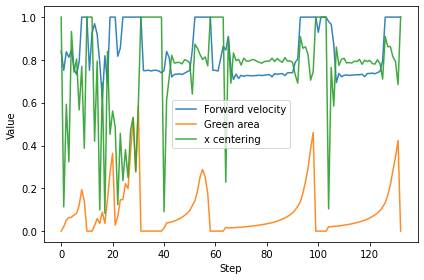

In [17]:

import pandas as pd
import matplotlib.pyplot as plt

# --- Load CSV ---
path = "results1.csv"   # adjust if needed
df = pd.read_csv(path)

steps = range(len(df))

forward = df["forward"].values
green_ratio = df["green_ratio"].values
align_reward = df["align_reward"].values

# --- Plot ---
plt.figure()
plt.plot(steps, forward, label="Forward velocity", alpha=0.9)
plt.plot(steps, green_ratio, label="Green area", alpha=0.9)
plt.plot(steps, align_reward, label="x centering", alpha=0.9)

plt.xlabel("Step")
plt.ylabel("Value")
# plt.title("Policy Behavior Signals (results1.csv)")
plt.legend()
plt.tight_layout()
plt.show

